In [49]:
# Nama : Salahuddin
# Email : solahuddin.hafid.tomaballo@gmail.com
# Asal : Makassar

Nama : Salahuddin
Email : solahuddin.hafid.tomaballo@gmail.com
Asal : Makassar

In [2]:
#mendownload dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2020-08-14 09:30:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  77.3MB/s    in 4.0s    

2020-08-14 09:30:11 (77.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [13]:
#mengekstrak data 
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)


['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [35]:
#cek jumlah dataset
print('total rock images :', len(os.listdir(base_dir + '/rock')))
print('total scissort images :', len(os.listdir(base_dir + '/scissors')))
print('total paper images :', len(os.listdir(base_dir + '/paper')))


total rock images : 726
total scissort images : 750
total paper images : 712


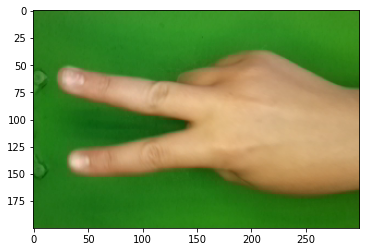

In [36]:
#cek dataset
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img(base_dir + '/scissors/0ePX1wuCc3et7leL.png')
imgplot = plt.imshow(img)

In [37]:
#membuat augmentasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator
  
train_dir = os.path.join(base_dir)
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.4) # set validation split

In [38]:
#membagi ke direktori trainng dan test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') 
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [39]:
#buat arsitektur model

import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 karena output tiga kelas
])

In [40]:
#optimizer dan loos
model.compile(optimizer=tf.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [41]:
#callback yang digunakan
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nAkurasi telah mencapai >96%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#melatih model
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2,
                              callbacks=callbacks)

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png
0RA9rcrv8iVvuDDU.png
[[1. 0. 0.]]
Paper


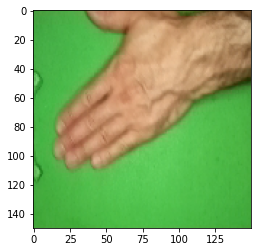

In [48]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('scissors')